In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("advertising.csv")
df=pd.DataFrame(data)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


EDA PROCESS

In [6]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

NO NULL VALUES,SO WE CAN PROCEED FURTHER

In [8]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


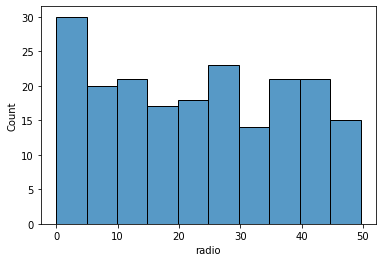

In [11]:
sns.histplot(x="radio",data=df,bins=10)
plt.show()

DISTRIBUTION IS NOT LINEAR IN RADIO

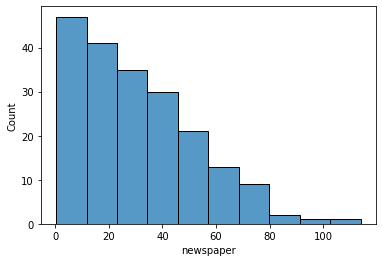

In [12]:
sns.histplot(x="newspaper",data=df,bins=10)
plt.show()

FAIRLY LINEAR DISTRIBUTION OF DATA IN NEWSPAPER

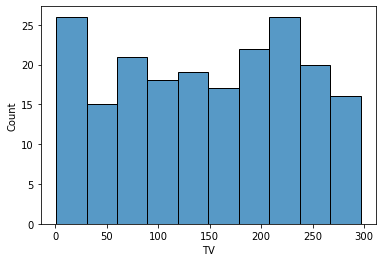

In [13]:
sns.histplot(x="TV",data=df,bins=10)
plt.show()

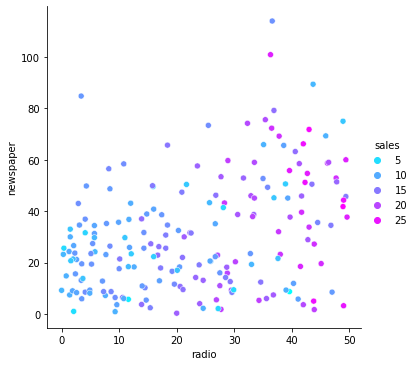

In [16]:
sns.relplot(data=df, x='radio', y='newspaper', kind='scatter', hue="sales",palette="cool")

<Figure size 504x504 with 0 Axes>

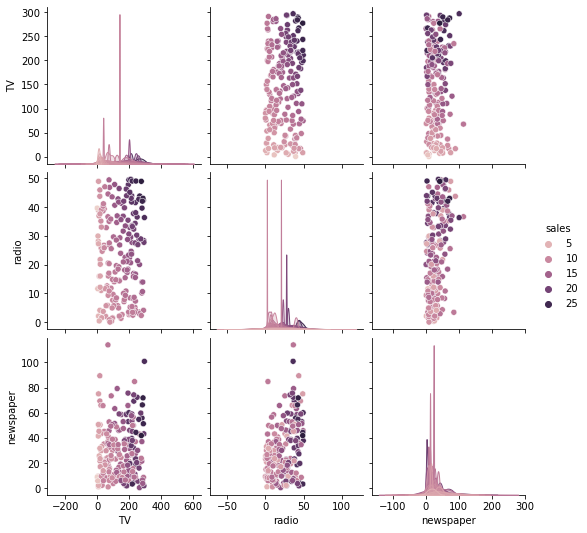

In [25]:
plt.figure(figsize=(7,7))
sns.pairplot(df,hue="sales")
plt.show()

In [26]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

TV              AxesSubplot(0.125,0.749828;0.133621x0.130172)
radio        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
newspaper     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
sales        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

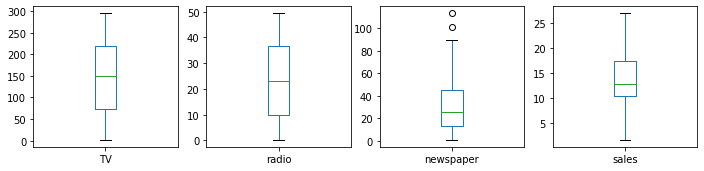

In [27]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [30]:
df.shape

(200, 4)

just 2 rows is reduced,so we can move for further process

In [32]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Now there is not much skewness in the dataset

<AxesSubplot:>

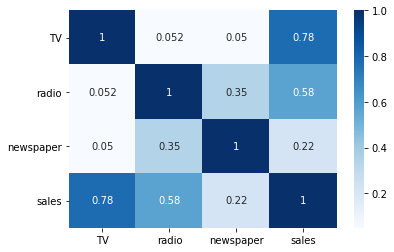

In [33]:
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")

MACHINE LEARNING PROCESS

In [34]:
x=df_new.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [36]:
y=df_new.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [41]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=RandomForestRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.986481540975399 on random state 179


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=179)

In [48]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 0.8541781032842541
training score= 0.9078919380435376
error= 1.8219297559283985 

testing score= 0.9362419273940771
training score= 1.0
error= 1.0691117808723276 

testing score= 0.6697590056543475
training score= 0.850820077931557
error= 2.104477595449961 

testing score= 0.9850692858544376
training score= 0.9960380201304245
error= 0.5350147194236812 

testing score= 0.7933221034465674
training score= 0.9467375905681312
error= 1.9033741968759936 



In [49]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.87859909 0.85628257 0.92837563 0.89712252 0.92021293 0.93075911
 0.76138086 0.909778   0.84242132 0.92741059]
mean_score= 0.8852342593723449
std= 0.05072928618095402 

score= [0.97412729 0.9662184  0.9810577  0.96281474 0.92661066 0.94180364
 0.91318288 0.95104241 0.96081424 0.94691911]
mean_score= 0.9524591069263563
std= 0.02002687536105675 

score= [0.89829128 0.823397   0.86650894 0.92462708 0.8104917  0.92260598
 0.84488837 0.88719625 0.72160189 0.85495147]
mean_score= 0.8554559956885708
std= 0.057737899248660976 

score= [0.9781286  0.98147486 0.98441499 0.98419711 0.9768058  0.97624573
 0.96934925 0.97630897 0.97806349 0.98666454]
mean_score= 0.9791653354402238
std= 0.004851229378462289 

score= [0.95863685 0.89454185 0.87457993 0.96065324 0.9189225  0.9579067
 0.88375127 0.92081206 0.87917024 0.96116532]
mean_score= 0.9210139969026295
std= 0.034584203923299174 



RandomForestRegressor is the best fit model as there is less diff between cross_val_score and the actual accuracy 

HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters={"criterion":["squared_error", "mse", "absolute_error", "mae", "poisson"],"max_leaf_nodes": np.arange(2,10),"max_depth": np.arange(2,10), "max_features": ["auto","sqrt","log2"]}

In [54]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [55]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error', 'mae', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [56]:
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': 9}

In [57]:
final_model=RandomForestRegressor(criterion="mse",max_depth=8,max_features="auto",max_leaf_nodes=9)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.9417000072078043
score= 0.9702370874280346
1.020623817360955


SAVING THE BEST MODEL

In [58]:
import joblib

joblib.dump(final_model,"advertisingfile.obj")

['advertisingfile.obj']

In [59]:
advertisingfile_from_joblib=joblib.load("advertisingfile.obj")
advertisingfile_from_joblib.predict(x_test)

array([19.37050215, 14.45615141, 12.31600302, 12.20494817, 12.176056  ,
       10.61168349, 12.32923851, 10.51639567, 15.60776869, 13.36230494,
       12.13034735, 16.23398057, 11.10514509, 12.18932743,  8.60339875,
       14.83211736,  8.47089823, 10.58641141, 20.91191367, 11.71263546,
       16.10510271, 12.03406857, 10.94516936, 24.3436972 , 12.50968226,
        6.97708154, 12.38503591, 21.27098661, 14.89825454, 10.80911625,
       10.85147542, 21.82015958, 18.30153826, 12.38503591, 21.54552073,
        6.90458526,  8.54045469, 10.09701262, 10.17790437, 18.91180577,
        6.92261026, 19.74896328, 10.1541736 , 12.13034735, 18.07370395,
       16.10510271, 10.29210571, 10.90558153, 11.82793879,  6.38880712,
       19.98814058, 16.08461592, 16.68497322, 15.0349032 ,  5.97688941,
       10.44231044, 12.31509615, 10.35260427, 14.9786012 , 10.24329257])